<h2>Categorical Variables Encoding</h2>

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [3]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [29]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


<h3 style='color:purple'>Dummy Variable Trap</h3>

When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of california and georgia then you can easily infer value of new jersey state, i.e. 
california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this
situation linear regression won't work as expected. Hence you need to drop one column. 

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [6]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [8]:
y = final.price

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [12]:
model.score(X,y)

0.9573929037221873

In [13]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [14]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

## Next Example

You work for a small bank and are responsible for determining if customers are creditworthy to give a loan to. Your team typically gets 200 loan applications per week and approves them by hand.
Due to a financial scandal that hit a competitive bank last week, you suddenly have an influx of new people applying for loans for your bank instead of the other bank in your city. All of a sudden you have nearly 500 loan applications to process this week!
Your manager sees this new influx as a great opportunity and wants you to figure out how to process all of these loan applications within one week.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Predicting Credit Worthiness/credit-data-training.xlsx')
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


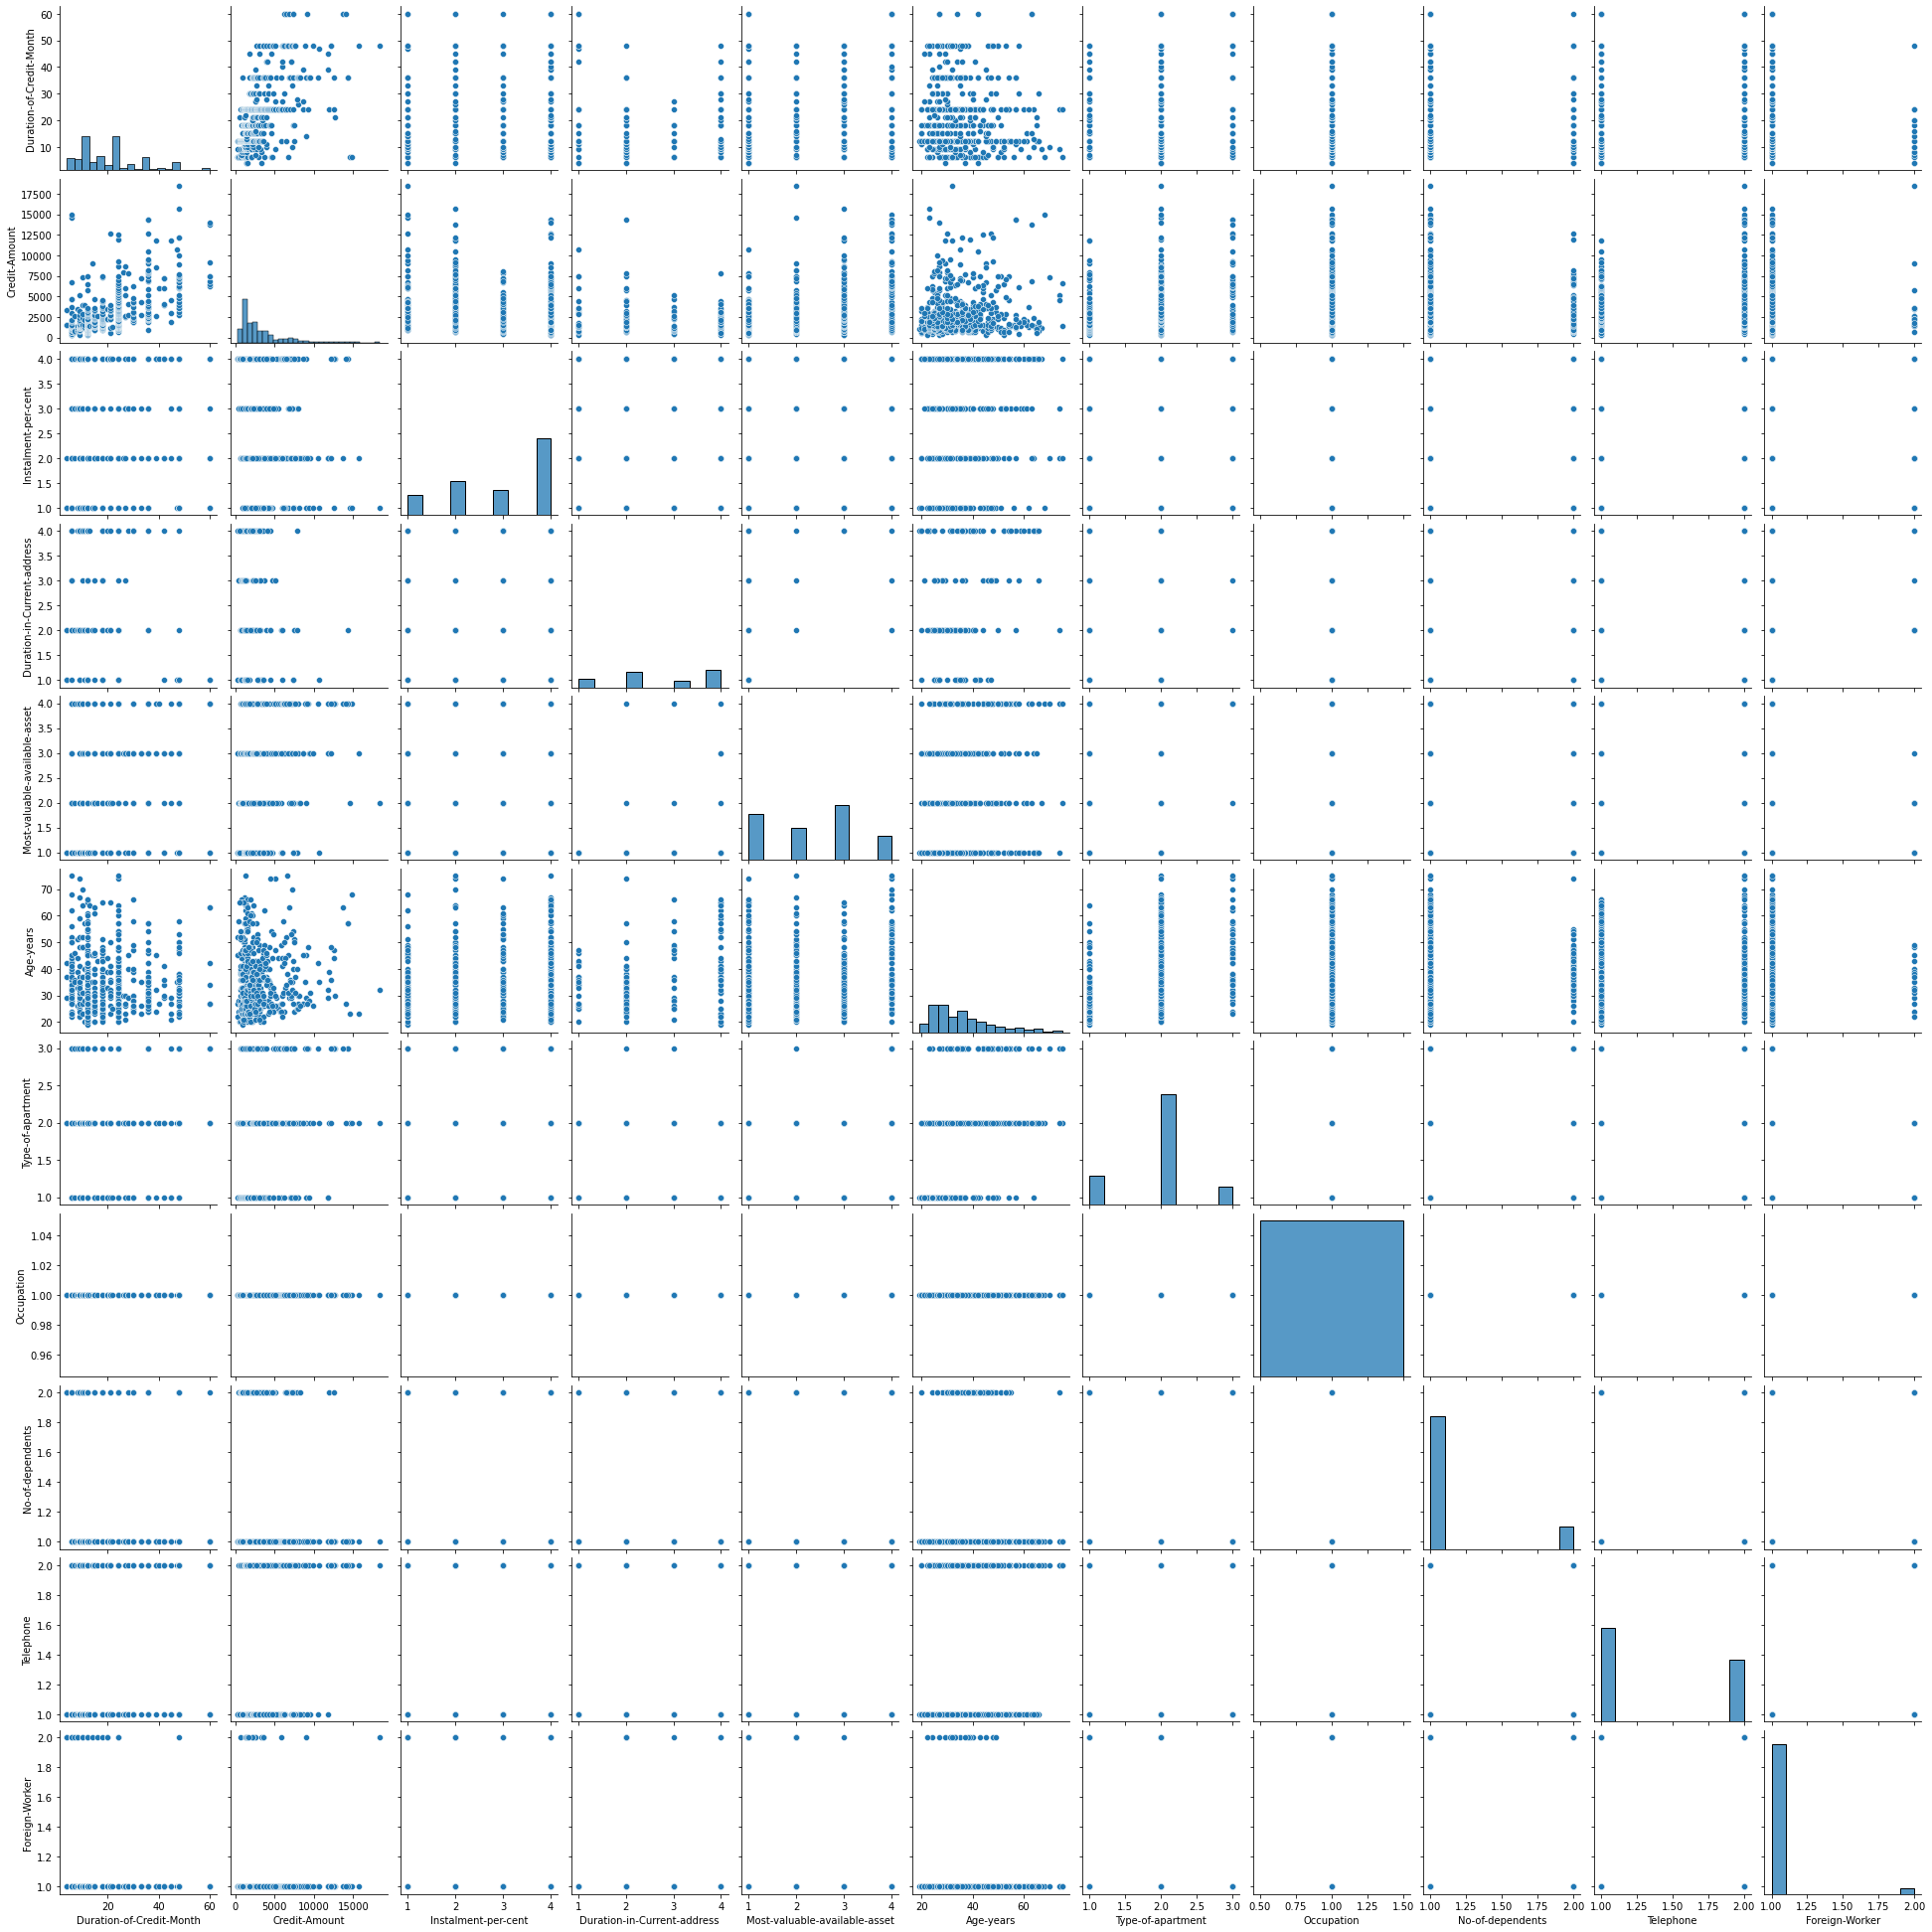

In [3]:
sns.pairplot(df);

Duration-in-Current Address has too many missing values, therefore there variables won't be used in the classification model. Guarantors, Concurrent-Credits, Occupation, No-of-Dependents, Foreign-Worker removed due to low variability (either have only one value or heavily skewed towards one value). 'Telephone' variable removed because it has no logical connection with the target

In [4]:
df_clean = df.iloc[:, :-4]
df_cleaned = df_clean.drop(columns=['Concurrent-Credits', 'Guarantors', 'Duration-in-Current-address'])
df_cleaned.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,NaN,2,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [5]:
df['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [6]:
df_cleaned['Age-years'] = df_cleaned['Age-years'].fillna(df['Age-years'].median())
#checking if imputing was done
df_cleaned['Age-years'].isna().sum()

0

In [7]:
outcomes_raw = df_cleaned['Credit-Application-Result']                  # Y
features_raw = df_cleaned.drop('Credit-Application-Result', axis = 1)   # X

In [8]:
features_raw.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


### Encoding Features and Outcomes

In [9]:
features = pd.get_dummies(features_raw)
features.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,1,33.0,2,0,1,0,1,...,1,0,0,0,1,0,0,1,1,0
1,4,1494,1,1,29.0,2,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0
2,4,1544,2,1,42.0,2,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,4,3380,1,1,37.0,2,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
4,6,343,4,1,27.0,2,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0


In [10]:
outcomes = pd.get_dummies(outcomes_raw)
#outcomes['Creditworthy'] = outcomes
outcomes.tail()

,Creditworthy,Non-Creditworthy
495,1,0
496,1,0
497,1,0
498,1,0
499,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=12)

**Now we can apply machine learning algorithms to this dataset.**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=12)
model_dt.fit(X_train, y_train)

In [ ]:
model_rf = RandomForestClassifier(random_state=12)
model_rf.fit(X_train, y_train)